<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/COMP90049/Week%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### The University of Melbourne, School of Computing and Information Systems
# COMP90049 Intro to Machine Learning, 2023

## Week 7 - Logistic Regression & Neural Network

___
## Theoretical questions


### 1.What is Logistic Regression? What is “logistic”? What are we “regressing”?

The model uses linear regression to calculate the log odds of P(y=1|x) (from which we can trivially derive P(y=1|x). A logistic regression classifier additionally defines a ‘decision boundary’, which is typically set at 0.5. If the model predicts the probability P(Y=1|x) > 0.5, we classify x as class 1. Otherwise, x is classified as class 0.

- Logistic: sigmoid function used in the model: $\sigma(z) = \frac{1}{1+e^{-z}}$
- We are regressing the log odds of p(y=1|x)

Logistic function has range [0,1] like probabilities, though it's not really a probability.

### 2. Build a logistic regression classifier, with $[\beta_0,\beta_1,\beta_2,\beta_3,\beta_4] = [0.2,0.3,−2.2,3.3,−0.2]$

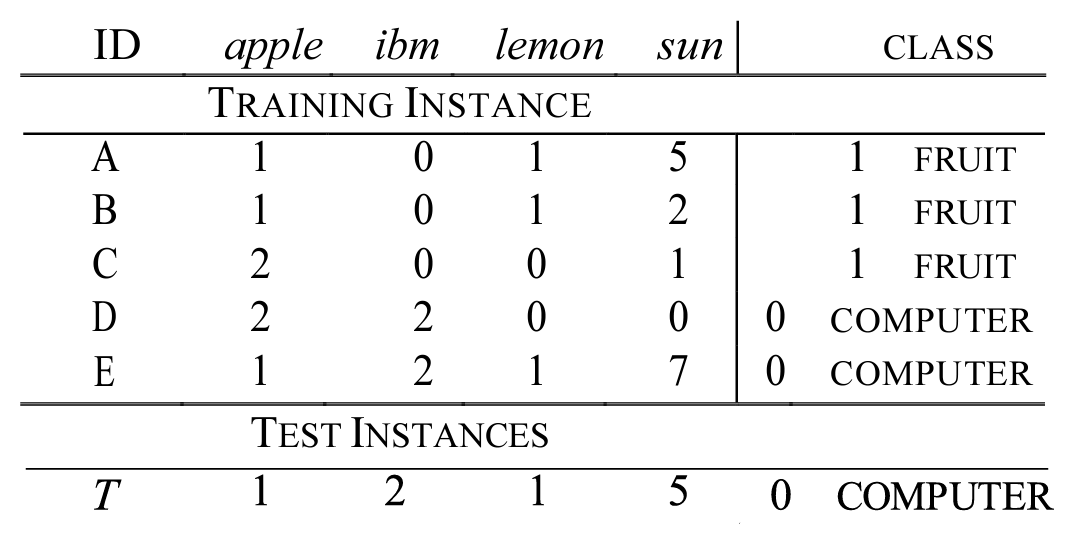

#### a. Explain the intuition behind the model parameters, and their meaning in relation to the features.
> In this dataset we want identify if a piece of writing is about computer or fruit (e.g.  ‘new apple iPhone is very expensive’ vs. ‘an apple a day, keeps the doctor away’). To do so, we are using 4 terms (apple, ibm, lemon, sun) and the count of their occurrences in a piece of writing. So for example we know that Doc A includes apple once and sun five times.

#### b. Predict the test instance

- Step 1: Get the linear regression result: $z = 0.2+0.3×1+(−2.2)×2+3.3×1+(−0.2)×5 = -1.6$
- Step 2: Put result into sigmoid function: $P(1|T) = \sigma(-1.6) = \frac{1}{1+e^{1.6}} = 0.17$
- Step 2.5: Get the other 'probability': $P(0|T) = 1-0.17 = 0.83$
- Step 3: $P(1|T) < 0.5$ ▶ Result is 0 (`COMPUTER`)

#### c. Design a test to make sure that the Loss of our model, is lower when its prediction the correct label for test instance T, than when it’s predicting a wrong label.  
Likelihood equation: $-log[L(\beta)] = -\sum_i\Big[ y_i log(\sigma_i) + (1-y_i) log(1-\sigma_i)\Big]$ where $\sigma_i = \sigma(x_i;\beta)$

Answer:

Just substitute the retrieved probabilities $P(1|T)$ and $P(0|T)$ into the equation. Since we only have 1 instance, the summation is not needed:
- y=1: $-log[L(\beta)] = -\Big[ 1 \times log(0.17) + (1-1) \times log(1-0.17)\Big] = -log(0.17) = 1.77$
- y=0: $-log[L(\beta)] = -\Big[ 0 \times log(0.17) + (1-0) \times log(1-0.17)\Big] = -log(0.83) = 0.19$

So y=0 have smaller loss than y=1.

### 3. For the model created in question 2, compute a single gradient descent update for parameter $𝛽_1$ given the training instances given above. Set learning rate to $𝛼=0.1$
Recall that for each feature j, we compute its weight update as $\beta_j ⟵ \beta_j + \alpha\frac{\partial L(\beta)}{\partial \beta_j}$

> Quik mafs: $\frac{\partial L(\beta)}{\partial \beta_j} = \sum_{instances}\Big[(y-\sigma_{x;\beta})x_1\Big]$

Step 1: Get logistic function for all training instances:

$𝜎(𝑥_A;𝛽)=𝜎[0.2+0.3×1−2.2×0+3.3×1−0.2×5]=0.94$

Similarly:

Instance|$\sigma$
---|---
A|0.94
B|0.97
C|0.65
D|0.03
E|0.12

Step 2: Update


$\beta_1 = 0.3−0.1[(0.94−1)×1+(0.97−1)×1+(0.65−1)×2+(0.03−0)×2 +(0.12−0)×1] = 0.3+0.061 = 0.361 $

<img src='https://img.ifunny.co/images/5f5eef4e71f2c71dc2500878169d54450259e444672e03ffeb7a4f2e6aa072a9_1.jpg' height=200/>

## 4. Consider the initial weight function as $𝑤=\{𝑤_0,𝑤_1,𝑤_2\} = \{0.2, -0.4, 0.1\}$, the  bias of 1 and the activation function of the perceptron as the step function of `f = int(sum > 0)`

($x_1$,$x_2$)|y
---|---
(0,0)|0
(0,1)|1
(1,1)|1

### a. Can perceptron find a perfect solution? Draw the perceptron graph and calculate the accuracy of the perceptron on the training data before training?
Yes. Because they are linearly separable (draw it on the graph and you'll see).

[![](https://mermaid.ink/img/pako:eNo9kMEOgjAMhl9l6QkTSITjDiaieNKLHp2HyaosymbGiBLgaXwfn8nBxJ7aL1-T_m0h1wKBwuWun3nBjSXbPVNVfb4a_ijIZsJMCWkwt1Kr0SCulkE8I1G06J7zjqTHz_vkeTpAsmqb3s_r4DWJsRM9zIJX8oPJH6ISEEKJpuRSuKvaATOwBZbIgLpWcHNjwFTvvPohuMVMSKsN0Au_VxgCr60-NCoHak2Nk7SW3AUq_xaOSzuffXxB_wVdKVWn?type=png)](https://mermaid.live/edit#pako:eNo9kMEOgjAMhl9l6QkTSITjDiaieNKLHp2HyaosymbGiBLgaXwfn8nBxJ7aL1-T_m0h1wKBwuWun3nBjSXbPVNVfb4a_ijIZsJMCWkwt1Kr0SCulkE8I1G06J7zjqTHz_vkeTpAsmqb3s_r4DWJsRM9zIJX8oPJH6ISEEKJpuRSuKvaATOwBZbIgLpWcHNjwFTvvPohuMVMSKsN0Au_VxgCr60-NCoHak2Nk7SW3AUq_xaOSzuffXxB_wVdKVWn)

($x_1$,$x_2$)|$0.2$-$0.4x_1$+$0.1x_2$|$\hat{y}$|y
---|---|---|---
(0,0)|0.2|1|0
(0,1)|0.3|1|1
(1,1)|-0.1|0|1

> Accuracy = 1/3

### b. Using the perceptron learning rule and the learning rate of 𝜆=0.2. Train the perceptron for one epoch. What are the weights after the training?


Update: $w_i$ += $𝜆(𝑦−\hat{𝑦})𝑥_i$

($x_1$,$x_2$)|$w_0$ + $w_1x_1$ + $w_2x_2$|$\hat{y}$|y| w0 | w1 | w2
---|---|---|---|---|---|---|
(0,0)|0.2 - 0.4 x 0 + 0.1 x 0 = 0.2|1|0| 0.2 + 0.2 (0−1) 1 = 0 | −0.4 + 0.2 x (0−1) x 0= −0.4 | 0.1 + 0.2 x (0−1) x 0 = 0.1
(0,1)|0 – 0.4 x 0 + 0.1 x 1 = 0.1|1|1|No need to update|
(1,1)|???|

Can you try the 3rd row?

($x_1$,$x_2$)|$w_0$ + $w_1x_1$ + $w_2x_2$|$\hat{y}$|y| w0 | w1 | w2
---|---|---|---|---|---|---|
(0,0)|0.2 - 0.4 x 0 + 0.1 x 0 = 0.2|1|0| 0.2 + 0.2 (0−1) 1 = 0 | −0.4 + 0.2 x (0−1) x 0= −0.4 | 0.1 + 0.2 x (0−1) x 0 = 0.1
(0,1)|0 – 0.4 x 0 + 0.1 x 1 = 0.1|1|1|No need to update
(1,1)|0 – 0.4 x 1 + 0.1 x 1 = – 0.3|0|1|0.2|-0.2|0.3

### c. What is the accuracy of the perceptron on the training data after training for one epoch? Did the accuracy improve?  

($x_1$,$x_2$)|$0.2$-$0.2x_1$+$0.3x_2$|$\hat{y}$|y
---|---|---|---
(0,0)|0.2|1|0
(0,1)|0.5|1|1
(1,1)|0.1|1|1

> 2/3 accuracy, improved from 1/3